In [2]:
#define folder location:


In [3]:
import numpy as np

x1 = np.random.normal(0,1,1000)
x2 = np.random.normal(0,5,30)
x3 = np.append(x1, x2)
np.random.shuffle(x3)
np.savetxt("1d_data.csv", x3, delimiter=",")

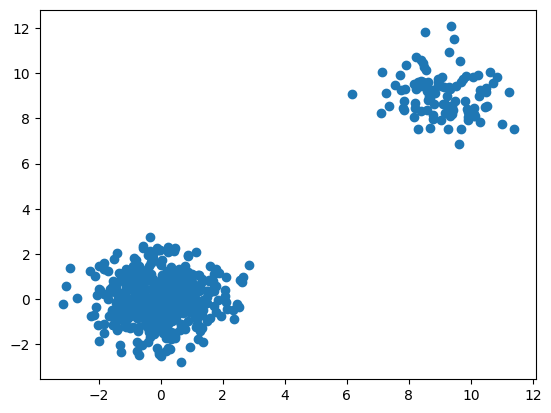

In [4]:
import numpy as np
import matplotlib.pyplot as plt

X=np.random.randn(600, 2)
X[500:] += 9
plt.scatter(x=X[:,0], y=X[:,1])

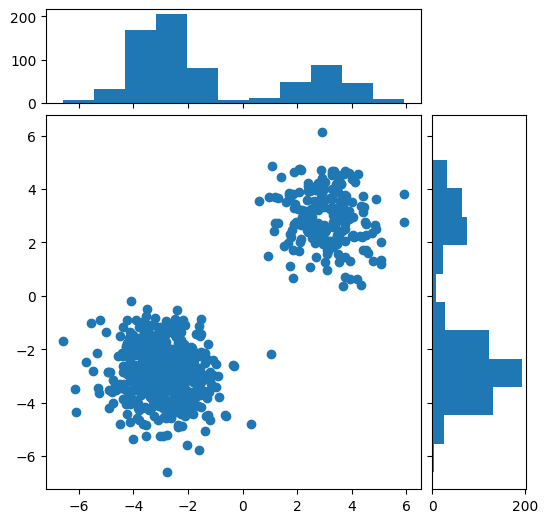

In [5]:
# Fixing random state for reproducibility
np.random.seed(19680801)

# some random data
X=np.random.randn(700, 2)
X[:500] -= 3
X[500:] += 3

# x = np.random.randn(1000)
# y = np.random.randn(1000)
x = X[:,0]
y = X[:,1]

def scatter_hist_for_2d_data(x, y, ax, ax_histx, ax_histy):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    ax_histx.hist(x, bins=bins)
    ax_histy.hist(y, bins=bins, orientation='horizontal')
    

def get_2d_distrib_plots(x, y):
    # Start with a square Figure.
    fig = plt.figure(figsize=(6, 6))
    # Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
    # the size of the marginal axes and the main axes in both directions.
    # Also adjust the subplot parameters for a square plot.
    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)
    # Create the Axes.
    ax = fig.add_subplot(gs[1, 0])
    ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
    ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
    # Draw the scatter plot and marginals.
    return scatter_hist_for_2d_data(x, y, ax, ax_histx, ax_histy)

get_2d_distrib_plots(x, y)

In [34]:
import pandas as pd
pd.DataFrame(X)

,0,1
0,-1.950696,-2.133901
1,-2.448865,-1.271922
2,-3.649288,-3.478420
3,-1.922115,-2.031190
4,-3.809345,-4.237389
...,...,...
695,3.757149,0.708597
696,3.523199,2.431196
697,3.477215,4.078165
698,3.775332,3.130480


In [22]:
def z_score_anomaly_indexes(data, threshold):
    #for 1d data
    mean = np.mean(data)
    std =  np.std(data)
    z_score = (data - mean) / std
    anomalies_boll = np.abs(z_score) > threshold
    anomaly_indexes = np.where(anomalies_boll)
    return anomaly_indexes

z_threshold = 2
anomaly_indexes = z_score_anomaly_indexes(x3,z_threshold)



In [23]:
x3.mean()

-0.0857012512142708

In [34]:
import pandas as pd
nparray = np.array([1,2,3,4])
pdcolumn = pd.DataFrame({'col1':[1,2,3,4]})
alist=[1,2,3,4]


print(nparray.mean())
print(pdcolumn['col1'].mean())
mean(alist)

2.5
2.5


NameError: name 'mean' is not defined

In [36]:
pdcolumn.to_numpy().mean()

2.5

<function matplotlib.pyplot.show(close=None, block=None)>

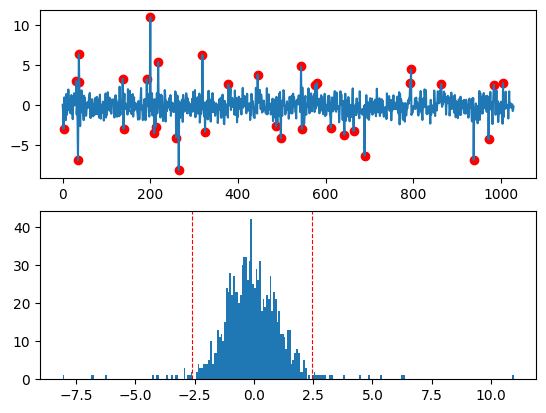

In [37]:
import matplotlib.pyplot as plt

def get_line_plot_and_hist_fig(np_data, z_threshold=2):
    fig, [ax1, ax2] = plt.subplots(2,1)
    x_mean = np_data.mean()
    x_std = np.std(np_data)
    x_z1 = x_mean - z_threshold * x_std 
    x_z2 = x_mean + z_threshold * x_std 

    ax2.hist(x3, int(len(x3)/4))
    ax2.axvline(x_z1, color = 'red', lw=0.8, ls='--')
    ax2.axvline(x_z2, color = 'red', lw=0.8, ls='--')
    ax1.plot(x3)
    ax1.scatter(anomaly_indexes,y=[np_data[i] for i in anomaly_indexes], color = 'red')
    return fig

fig = get_line_plot_and_hist_fig(np_data=x3)
plt.show

In [5]:
anomaly_indexes[0]

array([ 12,  30,  44,  52,  69, 110, 128, 232, 237, 259, 272, 289, 291,
       300, 314, 364, 373, 402, 451, 464, 473, 477, 542, 547, 587, 595,
       685, 722, 769, 784, 794, 799, 801, 820, 826, 843, 860, 959, 964,
       982], dtype=int64)